# 【問題1】線形回帰のクラスを作成する

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [114]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.X = X
        self.X_val = X_val
        self.y_val = y_val
        self.theta = np.random.randn(self.X.shape[1],1)
        if self.bias is not None:
            #self.theta = np.insert(self.theta, 0, self.bias)
            self.X = np.insert(self.X, 0, np.ones(self.X.shape[0]),axis=1)
            self.theta = np.random.randn(self.X.shape[1],1)
        if self.X_val is not None and self.bias is not None:
            #バイアスフラグがNoneでないときは配列を拡張する
            self.X_val = np.insert(self.X_val, 0, np.ones(self.X_val.shape[0]),axis=1)
        self.y = y
        self._gradient_descent()
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            self.show_loss_plt()
            
            
            
    
    
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = np.dot(X,self.theta)
        return h

    def MSE(self,y_pred,y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        mse = ((y_pred - y)**2).mean() /2.0
        return mse

    def _gradient_descent(self):
        """
        最適化した勾配を返す。
        誤差の過程をトレーニングセットの損失はlossを,テストセットは損失をval_lossに入れる
       
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            勾配を最適化した結果
        """
        m =  len(self.X)
        for i in range(self.iter):
            self.theta = self.theta - self.lr * np.dot(self.X.T,(self._linear_hypothesis(self.X) - self.y))/m
            y_pred = self._linear_hypothesis(self.X)
            self.loss[i] = self.MSE(y_pred,self.y)
            
            if self.X_val is not None and self.y_val  is not None:
                y_pred_val = np.dot(self.X_val,self.theta)
                self.val_loss[i] = self.MSE(y_pred_val,self.y_val)

        return self.theta
    
    

    def predict(self,X_val):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプルl

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        predict_y = self._linear_hypothesis(self.X_val)
        
        return predict_y
    
    def show_loss_plt(self):
        """
        トレーニングセットが緑
        テストセットが青で損失関数の値をプロットする
        
        """
        sr_itr = np.linspace(1,self.iter,self.iter)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        #トレーニングセットしが緑
        ax.plot(sr_itr[:, np.newaxis],self.loss[:, np.newaxis],color="g")
        if self.X_val is not None and self.y_val  is not None:
        #テストセットは青
            ax.plot(sr_itr[:, np.newaxis],self.val_loss[:, np.newaxis],color="b")
        ax.set_xlabel('イテレータの回数')
        ax.set_ylabel('誤差関数の値')
        plt.show()
        self.loss =[]
        self.val_loss =[]

In [115]:
df = pd.read_csv("train.csv")
#print(df.loc[:,['GrLivArea']].shape)
#print(df.loc[:,['SalePrice']].shape)

In [116]:
X =df.loc[:,['GrLivArea','YearBuilt']]
y = df.loc[:,['SalePrice']]
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
y_train_std = sc.fit_transform(y_train)
y_test_std = sc.fit_transform(y_test)



/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 we

In [117]:
sr = ScratchLinearRegression(40, 0.1, False, True)

# 【問題2】学習曲線のプロット

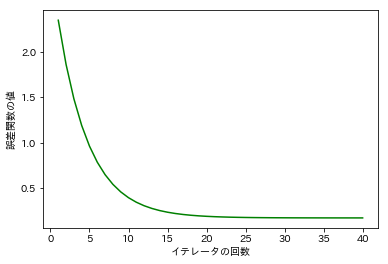

In [118]:
sr.fit(X_train_std,y_train_std,None,None)

# 【問題3】（アドバンス課題）バイアス項の除去

In [119]:
sr = ScratchLinearRegression(40, 0.1, None, True)

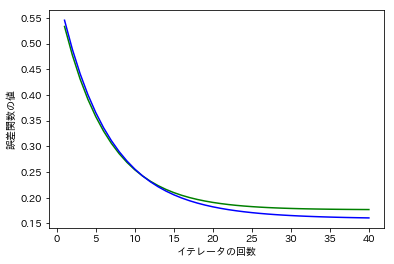

In [120]:
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)
#テストセットの方が最適化率が良い

# 【問題4】（アドバンス課題）特徴量の多次元化

In [121]:
#特徴量を２乗する。
X1 =df.loc[:,['YearBuilt']]**2
X2=df.loc[:,['GrLivArea']]**2

In [122]:
X = pd.concat([X1, X2], axis=1)
y = df.loc[:,['SalePrice']]
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
y_train_std = sc.fit_transform(y_train)
y_test_std = sc.fit_transform(y_test)

/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 we

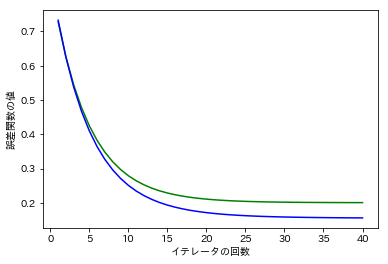

In [123]:
#バイアス有り　特徴量２乗
sr = ScratchLinearRegression(40, 0.1, True, True)
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)
#最適化率が明らかにテストセットの方が良い。ただ損失関数の値を見ると上記バイアス無しの方がバイアス有りのトレーニングセットの方より収束が良いのは何故か？

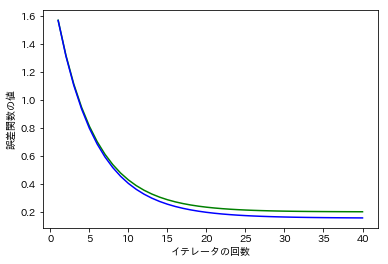

In [124]:
#バイアス無し　特徴量２乗
sr = ScratchLinearRegression(40, 0.1, None, True)
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)

In [125]:
#特徴量を３乗している
X3 =df.loc[:,['YearBuilt']]**3
X4=df.loc[:,['GrLivArea']]**3
X = pd.concat([X3, X4], axis=1)
y = df.loc[:,['SalePrice']]
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
y_train_std = sc.fit_transform(y_train)
y_test_std = sc.fit_transform(y_test)

/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 we

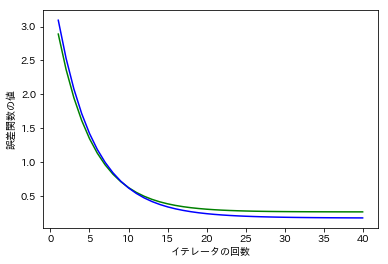

In [126]:
#バイアス有り　特徴量3乗　イテレート１５回でやっと損失が0.5になっているので特徴量をいじらない方が最適化している。
#３乗よりは２乗の方が損失誤差が良い
sr = ScratchLinearRegression(40, 0.1, True, True)
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)

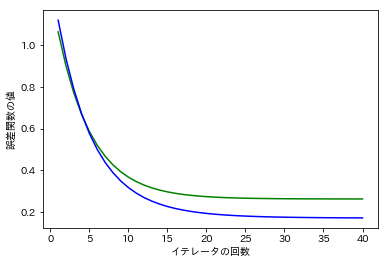

In [127]:
#バイアス無し　特徴量3乗
#バイアス無しでは損失が２乗の時と同じくらいのスペックが出ている。
sr = ScratchLinearRegression(40, 0.1, None, True)
sr.fit(X_train_std,y_train_std,X_test_std,y_test_std)

終始トレーニングセットよりテストセットの方が損失関数の値が良い。よく見ると最初のイテレータ数回はトレーニングセットの方が値が良いのでこのモデルは汎化が思いの外良いのがわかる

# 【問題7】スクラッチで学べることは何か

目的変数を予測する為に説明変数がどのような加工を受けて予測値になるのか？
説明変数のshapeと重みのshapeが内積されて目的変数の形になるのかを確認できる。
ライブラリを知っているだけでは決まった提携の分析しか出来ないが理論を知っていればプログラムをチューニングできる。
またsklearnの内部の挙動を知る事で数式とのつながりの理解ができ、逆に数式を知ることで新しい論文に出てくる数式をプログラミングに落とすことも可能になる。
